In this project, we'll see how linear models work if there are collinear features present in the dataset. To check collinearity between the features, perturbation test will be done, weights and accuracy scores will be calculated and recorded, additional gaussian noise will be added to see these metrics and weights changes. SVM and Logistic Regression algorithms will be used.

In [1]:
# required imports

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
# csv file
data = pd.read_csv('E:/GITHUB REPOS/effect-of-collinear-features-on-linear-models/collinear_features_data.csv')

print(data.head())

          x         y         z       x*x       2*y  2*z+3*x*x         w  \
0 -0.581066  0.841837 -1.012978 -0.604025  0.841837  -0.665927 -0.536277   
1 -0.894309 -0.207835 -1.012978 -0.883052 -0.207835  -0.917054 -0.522364   
2 -1.207552  0.212034 -1.082312 -1.150918  0.212034  -1.166507  0.205738   
3 -1.364174  0.002099 -0.943643 -1.280666  0.002099  -1.266540 -0.665720   
4 -0.737687  1.051772 -1.012978 -0.744934  1.051772  -0.792746 -0.735054   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [3]:
# splitting the data into X and y
X = data.drop(['target'], axis=1)
y = data['target'].values

<h1>Finding correlation between the features</h1>

In [4]:
# prints pairwise correlation betweeen all the columns/features of the dataset
# Note - correlation of a feature with itself is unit(1) value. (e.g. corr of x with x is 1)
print(data.corr())

                  x         y         z       x*x       2*y  2*z+3*x*x  \
x          1.000000 -0.205926  0.812458  0.997947 -0.205926   0.996252   
y         -0.205926  1.000000 -0.602663 -0.209289  1.000000  -0.261123   
z          0.812458 -0.602663  1.000000  0.807137 -0.602663   0.847163   
x*x        0.997947 -0.209289  0.807137  1.000000 -0.209289   0.997457   
2*y       -0.205926  1.000000 -0.602663 -0.209289  1.000000  -0.261123   
2*z+3*x*x  0.996252 -0.261123  0.847163  0.997457 -0.261123   1.000000   
w          0.583277 -0.401790  0.674486  0.583803 -0.401790   0.606860   
target     0.728290 -0.690684  0.969990  0.719570 -0.690684   0.764729   

                  w    target  
x          0.583277  0.728290  
y         -0.401790 -0.690684  
z          0.674486  0.969990  
x*x        0.583803  0.719570  
2*y       -0.401790 -0.690684  
2*z+3*x*x  0.606860  0.764729  
w          1.000000  0.641750  
target     0.641750  1.000000  


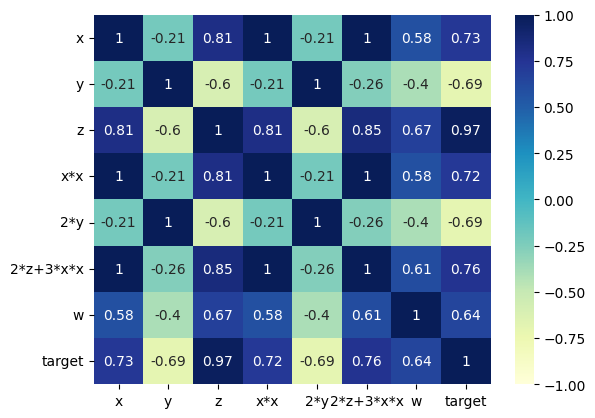

In [5]:
# plotting heatmap of the correlation matrix of all the features/columns
# annot=True gives correlation value of each cell # vmin=-1 and vmax=1 is setting limits of the heatmap (-1 to 1) # cmap="YlGnBu" using different colour for heatmap
heatmap = sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, cmap="YlGnBu")
plt.show()

<h1>Logistic Regression</h1>

<h3>1. Finding the best LR model for the given data</h3>

In [6]:
# Train Logistic regression on data(X,y)
# calling the SGDClassifier() for logistic regression
clf = SGDClassifier(loss='log')

clf.fit(X,y)

SGDClassifier(loss='log')

In [7]:
# Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation
# params here are alpha values that are evenly separated on log scale # reference - https://www.javatpoint.com/numpy-logspace
params = {'alpha': np.logspace(-4,4,10)}

# calling the GridSearchCV() for k fold cross validation on trained Logistic Regression classifier(clf)
gridsearch = GridSearchCV(clf, params)

# training the GridSearchCV() on (X,y) data
gridsearch.fit(X,y) 

GridSearchCV(estimator=SGDClassifier(loss='log'),
             param_grid={'alpha': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])})

In [8]:
# printing the best/optimal value of alpha 
print(gridsearch.best_params_) 

{'alpha': 0.0001}


In [9]:
# Creating a new Logistic regression with the best alpha
# calling the SGDClassifier() for logistic regression with the best alpha obtained
best_model = SGDClassifier(loss='log', alpha= 0.0001)

<h3>2. Getting the accuracy and weights with the original data</h3>

In [10]:
# training the 'best_model' with X, y
best_model.fit(X,y)

SGDClassifier(loss='log')

In [11]:
# Check the accuracy of the model 'best_model_accuracy'
# SGDClassifier() provides us with score() to calculate the accuracy of the classifier
best_model_accuracy = best_model.score(X,y)

# printing the best LR model's accuracy
print(best_model_accuracy) 

1.0


In [12]:
# Get the weights W using best_model.coef_
# coef() gives us the array of weights (estimated coefficients)
W = best_model.coef_

# printing the weights of the best model
print(W) 

[[ 7.19541163 -8.35844337 16.61595972  6.1516865  -8.35844337  7.54265566
   4.02827796]]


<h3>3. Modifying the original data</h3>

In [16]:
# Add a noise(order of 10^-2) to each element of X and get the new data set X' (X' = X + e)
# generating noise(order of 10^-2) of gaussian distribution with mean = 10^-2 and variance = 0 # reference - https://www.researchgate.net/post/How-to-add-some-noise-data-to-my-classification-datasets
noise1 = np.random.normal(10**(-2),0,X.shape)

# adding the generated noise to the original data
X_dash = X + noise1

In [17]:
# Train the same 'best_model' with data (X', y)
best_model.fit(X_dash,y)

SGDClassifier(loss='log')

In [18]:
# Check the accuracy of the model 'best_model_accuracy_edited'
best_model_accuracy_edited = best_model.score(X_dash,y)

# printing the best LR model's accuracy for modified data
print(best_model_accuracy_edited) 

1.0


In [19]:
# Get the weights W' using best_model.coef_
# coef() gives us the array of weights (estimated coefficients)
W_dash = best_model.coef_

# printing the weights of the best model for modified data
print(W_dash) 

[[  9.61606699 -10.41200524  13.49470823   9.39133964 -10.41200524
   10.08262991   4.2013575 ]]


<h3>4. Checking deviations in metric and weights</h3>

In [20]:
# finding the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
difference = float(best_model_accuracy - best_model_accuracy_edited)

print(difference)

0.0


In [21]:
# finding the absolute change between each value of W and W' ==> |(W-W')|
# abs() used to calculate the absolute values(positive sign numbers only)
absolute_change = abs(W - W_dash)

print(absolute_change)

[[2.42065536 2.05356187 3.12125149 3.23965314 2.05356187 2.53997425
  0.17307955]]


In [24]:
# printing the top 4 features which have higher % change in weights compared to the other features
# sorting the features list in descending order(higher to lower) and then accessing the first 4 features(top 4 features)
top4_features = sorted(absolute_change[0], reverse=True)[:4] 
print(top4_features)

# code to print the names of top 4 features which are having higher % change in weights
# storing the feature names in a list
columns = list(data.columns)

# argsort() used to get indices that would sort the list # reference - https://numpy.org/doc/stable/reference/generated/numpy.argsort.html
for index in np.argsort(absolute_change[0])[-4:]: 
  print(columns[index])

[3.2396531439655787, 3.1212514860779983, 2.5399742485031833, 2.420655361324876]
x
2*z+3*x*x
z
x*x


# Observation:


*   For Logistic Regression, we observe that the feature weights changes, after the addition of very little noise to the original data. This indicates the presence of multlicollinearity.
*   Even in the change in weights(coefficients), the change in accuracy is zero.

*   We cannot use these weights(coefficients) for feature importance directly, as they are highly collinear with each other

<h1>Support Vector Machines</h1>

<h3>1. Finding the best SVM model for given data</h3>

In [25]:
# Training Linear SVM on data(X,y)
# calling the SGDClassifier() for Linear SVM # passing loss='hinge' for SVM
clf = SGDClassifier(loss='hinge')

clf.fit(X,y)

SGDClassifier()

In [26]:
# Finding the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation 
params = {'alpha': np.logspace(-4,4,10)}

# calling the GridSearchCV() for k fold cross validation on trained Linear SVM classifier(clf)
gridsearch = GridSearchCV(clf, params) 

gridsearch.fit(X,y)

GridSearchCV(estimator=SGDClassifier(),
             param_grid={'alpha': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])})

In [27]:
# printing the best/optimal value of alpha 
print(gridsearch.best_params_) 

{'alpha': 0.0001}


In [28]:
# Creating a new Linear SVM with the best alpha 
best_model = SGDClassifier(loss='hinge', alpha= 0.0001)

<h3>2. Getting the accuracy and the weights with the original data</h3>

In [29]:
# train the 'best_model' with X, y
best_model.fit(X,y)

SGDClassifier()

In [30]:
# Checking the accuracy of the model 'best_model_accuracy'
best_model_accuracy = best_model.score(X,y)

print(best_model_accuracy)

1.0


In [31]:
# Getting the weights W using best_model.coef_
W = best_model.coef_

print(W)

[[ 6.96482656 -8.16865559 23.50976661  5.73875247 -8.16865559  8.00331548
   2.38890647]]


<h3>3. Modifying the original data</h3>

In [32]:
# Adding a noise(order of 10^-2) to each element of X and get the new data set X' (X' = X + e)
noise2 = np.random.normal(10**(-2),0,X.shape)

# adding the generated noise to the original data
X_dash = X + noise2 

In [33]:
# Training the same 'best_model' with data (X', y)
best_model.fit(X_dash,y)

SGDClassifier()

In [34]:
# Checking the accuracy of the model 'best_model_accuracy_edited'
best_model_accuracy_edited = best_model.score(X_dash,y)

print(best_model_accuracy_edited)

1.0


In [35]:
# Getting the weights W' using best_model.coef_
W_dash = best_model.coef_

print(W_dash)

[[ 9.21845423 -9.88508293 13.46697975 10.18228486 -9.88508293 10.7900483
   8.03473596]]


<h3>4. Checking deviations in metric and weights</h3>

In [36]:
# finding the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
difference = float(best_model_accuracy - best_model_accuracy_edited)

print(difference)

0.0


In [37]:
# finding the absolute change between each value of W and W' ==> |(W-W')|
absolute_change = abs(W - W_dash) # abs() used to calculate the absolute values(positive sign numbers only)

print(absolute_change)

[[ 2.25362767  1.71642734 10.04278686  4.44353239  1.71642734  2.78673282
   5.64582949]]


In [38]:
# printing the top 4 features which have higher % change in weights compared to the other features
# sorting the features list in descending order(higher to lower) and then accessing the first 4 features(top 4 features)
top4_features = sorted(absolute_change[0], reverse=True)[:4] 
print(top4_features)

# code to print the names of top 4 features which are having higher % change in weights
# storing the feature names in a list
columns = list(data.columns)

# argsort() used to get indices that would sort the list # reference - https://numpy.org/doc/stable/reference/generated/numpy.argsort.html
for index in np.argsort(absolute_change[0])[-4:]: 
  print(columns[index])

[10.042786860915847, 5.6458294855132465, 4.44353238807123, 2.786732824386819]
2*z+3*x*x
x*x
w
z


# Observation:


*   For Linear SVM also, we observe that the feature weights changes, after the addition of very little noise to the original data. This indicates the presence of multlicollinearity.
*   Even in the change in weights(coefficients), the change in accuracy is zero.

*   We cannot use these weights(coefficients) for feature importance directly, as they are highly collinear with each other
